# Week 5: machine learning

Speed dating experiment with Random Forest. We're going to predict the decision by partner.

Dataset can be found on Kaggle: https://www.kaggle.com/annavictoria/speed-dating-experiment

In [1]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Importing the data file

In [19]:
df = pd.read_csv('Speed-Dating-Data.csv', encoding='ISO-8859-1')
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


The data consists of a number of variables which are described on Kaggle. We are going to pick 7 variables. We are predicting dec_o: decision of partner the night of event. 

In [20]:
df.fillna(0, inplace = True) # filling all NaNs with 0's in the dataframe

In [21]:
df['dec_o'].value_counts()

0    4863
1    3515
Name: dec_o, dtype: int64

There are a lot more non-matches than matches. 41.96% is a match. We can even get 58.04% accuracy by claiming nothing is a match (a really simple "model")!

## Subsetting the data

We're subsetting the data to make it a little bit smaller. We're going to take a look at the attribute scores the partners gave to the participant.

In [36]:
df_sub = df[['sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o']]
df_sub.head()

,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
0,8.0,8.0,8.0,8.0,6.0,7.0,4.0
1,8.0,10.0,7.0,7.0,5.0,8.0,4.0
2,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,8.0,9.0,8.0,9.0,8.0,7.0,7.0
4,7.0,9.0,6.0,9.0,7.0,8.0,6.0


Let's get our X and y and split the data.

In [37]:
X = df_sub #This gets all the columns from the subsetted dataframe
y = df['dec_o']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Training the algorithm
Let's train the Random Forest algorithm. RF uses randomness, so we need to set a random_state if we want the result to be stable for presentation purposes.

I've also set the number of trees (n_estimators) to 100. This will become the default number of trees in the future of the sklearn package, since current literature suggests using more trees than was used traditionally (10). Also, computing power has increased (more trees require more computing power). The following might take half a minute or so to run, depending on your machine.

In [38]:
rf = RandomForestClassifier(random_state=1, n_estimators=100) #RF is a random algorithm, so to get the same results we need to use random_state
rf = rf.fit(X_train, y_train)

## Evaluating the model


Let's evaluate the model using our standard approach for a classification problem: making a confusion matrix and calculating accuracy, precision and recall.

The confusion matrix uses the sorted labels, so 0 comes first, 1 second.

In [39]:

y_pred = rf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
cm = pd.DataFrame(cm, index=['no match (actual)', 'match (actual)'], columns = ['no match (pred)', 'match (pred)']) #label and make df
cm

,no match (pred),match (pred)
no match (actual),1159,316
match (actual),330,709


As we can see from the confusion matrix, matches are detected well. Let's calculate some numbers. We're going to do it the easy way using a function called classification_report.

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1475
           1       0.69      0.68      0.69      1039

    accuracy                           0.74      2514
   macro avg       0.74      0.73      0.73      2514
weighted avg       0.74      0.74      0.74      2514



The precision and recall are almost similar to each other. I was hoping for a better precision, because I thought that you could already be pretty precise when you take a look at how the participants scored each other. Looks like a lot of other things come into play when it comes to dating.


## Making use of probabilities

We saw that recall is probably the most important measure in this case. We also saw that there is a trade-off between precision and recall. So can we improve recall at the expense of precision?

Yes, it turns out we can. What actually happens "under the hood" of the algorithm, is that a probability is calculated. The algorithm then classifies cases according to this probability. The standard setting is to select the outcome with the highest probability. But, we can also work with the probabilities themselves.

Let's get the probabilities using predict_proba.

In [41]:
y_pred_prob = rf.predict_proba(X_test) #Instead of classes, we now get the probabilities
y_pred_prob

array([[0.07282692, 0.92717308],
       [0.5       , 0.5       ],
       [0.65081607, 0.34918393],
       ...,
       [0.36154762, 0.63845238],
       [0.77833333, 0.22166667],
       [0.6225    , 0.3775    ]])

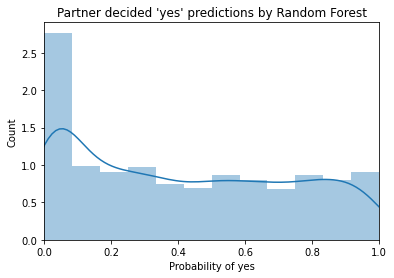

In [43]:
dec_prob = y_pred_prob[:,1] #this subsets the second column (fraud)
sns.distplot(fraud_prob)
plt.xlim(0,1)

plt.xlabel("Probability of yes")
plt.ylabel("Count")
plt.title("Partner decided 'yes' predictions by Random Forest")
plt.show()

It's interesting to see that the model is very good at seeing a 0 percent probability. But after that it gets difficult.

# Decision tree

I also wanted to give Desicion Tree a quick try.

In [44]:
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split #We need this to split the data

In [45]:
X = df_sub #create the X matrix
y = df['dec_o'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [46]:
from sklearn.tree import DecisionTreeClassifier #the object class we need

dtree = DecisionTreeClassifier() #create the tree
dtree = dtree.fit(X_train, y_train) #fit the tree with the train data

In [47]:
conda install graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / ^C
failed

Note: you may need to restart the kernel to use updated packages.


In [48]:
conda install python-graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ ^C
failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


### So yeah, it failed and didn't want to try anymore